In [22]:
# preprocessing step 1: convert the h264 to mp4

import glob
import os
import subprocess
import numpy as np

videos = "../videos/videos_tags/videos_tags_mp4"

if not os.path.exists(videos):
    os.mkdir(videos)

# Title

In [26]:
# create test set
l_videos = glob.glob(os.path.join('../videos/videos_tags/', '*.h264'))
np.random.shuffle(l_videos)
l_videos

['../videos/videos_tags/e00_2018-08-19-05-25-51.h264',
 '../videos/videos_tags/e00_2018-08-19-18-33-03.h264',
 '../videos/videos_tags/e00_2018-08-19-20-26-47.h264',
 '../videos/videos_tags/e00_2018-08-19-10-28-44.h264',
 '../videos/videos_tags/e00_2018-08-19-18-25-21.h264',
 '../videos/videos_tags/e00_2018-08-19-08-00-26.h264',
 '../videos/videos_tags/e00_2018-08-19-17-57-01.h264',
 '../videos/videos_tags/e00_2018-08-19-12-34-35.h264',
 '../videos/videos_tags/e00_2018-08-19-13-11-16.h264',
 '../videos/videos_tags/e00_2018-08-19-17-53-31.h264',
 '../videos/videos_tags/e00_2018-08-19-06-35-41.h264',
 '../videos/videos_tags/e00_2018-08-19-18-13-06.h264',
 '../videos/videos_tags/e00_2018-08-19-12-06-44.h264',
 '../videos/videos_tags/e00_2018-08-19-20-10-16.h264',
 '../videos/videos_tags/e00_2018-08-19-15-52-54.h264',
 '../videos/videos_tags/e00_2018-08-19-04-28-08.h264',
 '../videos/videos_tags/e00_2018-08-19-11-55-18.h264',
 '../videos/videos_tags/e00_2018-08-19-10-22-39.h264',
 '../video

In [41]:
counter = 0
for video in glob.glob(os.path.join('../videos/videos_tags/', '*.h264')):  
    path = os.path.split(video)   
    video_mp4 = os.path.join(path[0],"videos_tags_mp4",os.path.splitext(path[1])[0] + '.mp4')

    print(video_mp4)
    subprocess.call(['ffmpeg', '-framerate', '10', '-fflags', '+genpts', '-i', video, '-c', 'copy', video_mp4])
    break

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-13.mp4


In [6]:
%env KERAS_BACKEND=theano
%env THEANO_FLAGS=floatX=float32,device=cpu

env: KERAS_BACKEND=theano
env: THEANO_FLAGS=floatX=float32,device=cpu


In [7]:
%load_ext autoreload
%autoreload 1
%aimport bb_behavior
%aimport bb_behavior.plot
%aimport bb_behavior.tracking
%aimport bb_behavior.tracking.pipeline

import bb_behavior
import bb_behavior.plot
import bb_behavior.tracking
import bb_behavior.tracking.pipeline

Using Theano backend.


## Run

In [8]:
default_pipeline = None

In [14]:
from bb_behavior.tracking.pipeline import get_default_pipeline
default_pipeline = get_default_pipeline(localizer_threshold="0.65")

/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [15]:
from tqdm import tqdm_notebook # progress bar

import math
import numpy as np
from bb_tracking.data.constants import DETKEY
#from bb_tracking.tracking import score_id_sim_v
from bb_tracking.tracking import distance_orientations_v, distance_positions_v

from bb_behavior.tracking.pipeline import detect_markers_in_video
from bb_behavior.tracking.pipeline import track_detections_dataframe
from bb_behavior.tracking.pipeline import display_tracking_results
tqdm_notebook

<function tqdm.tqdm_notebook>

In [20]:

configs = [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1.0,
            start_time=None,
            fps=10.0,
            cam_id=0)
]
configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.1,
             confidence_filter_tracks=0.1,
             coordinate_scale=1.0,
            start_time=None,
            fps=10.0,
            cam_id=0)
]

configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.2,
             confidence_filter_tracks=0.2,
             coordinate_scale=1,
            start_time=None,
            fps=10.0,
            cam_id=0)
]

configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.3,
             coordinate_scale=1.0,
            start_time=None,
            fps=10.0,
            cam_id=0)
]

configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=0.85,
            start_time=None,
            fps=3.0,
            cam_id=0)
]

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


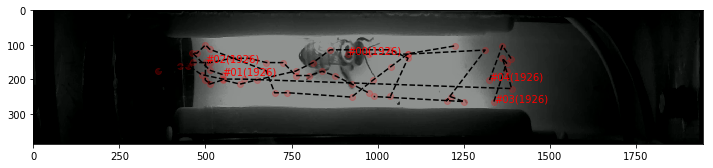

Detection/track statistics:


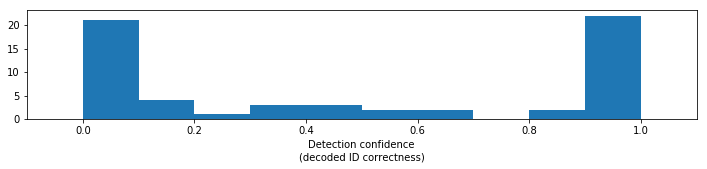

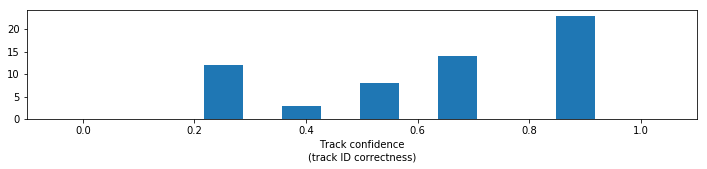

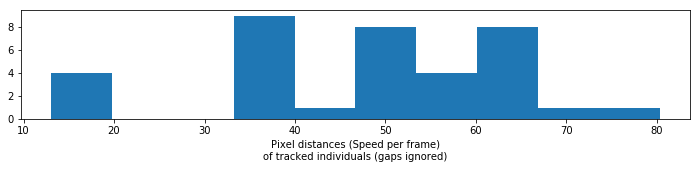

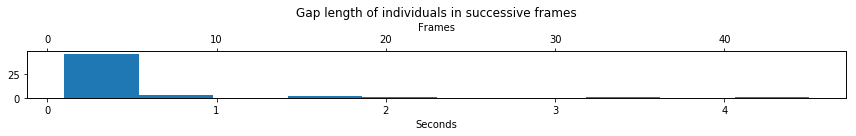

Individual statistics:


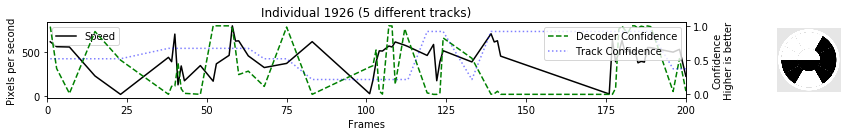

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 1.0, 'start_time': None, 'fps': 10.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 4 unique tracks and 1 individuals.


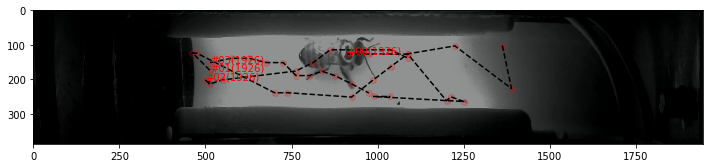

Detection/track statistics:


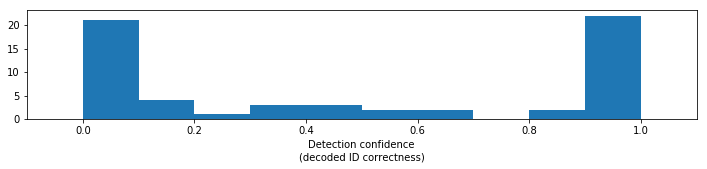

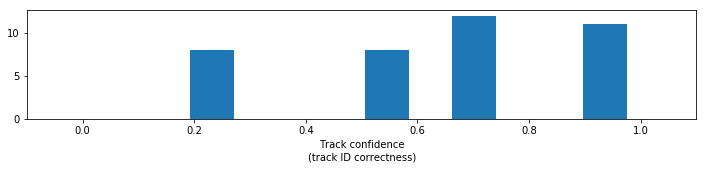

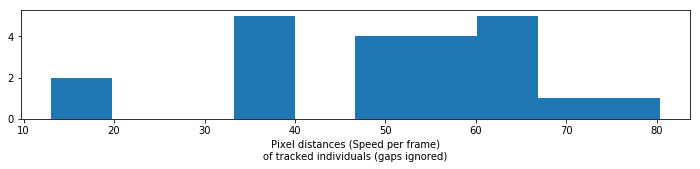

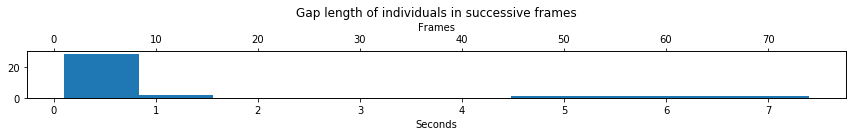

Individual statistics:


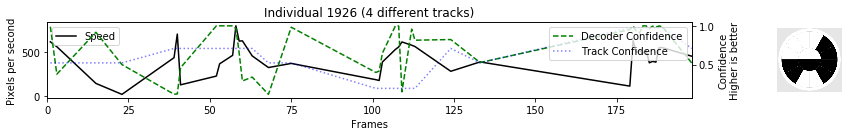

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.1, 'confidence_filter_tracks': 0.1, 'coordinate_scale': 1.0, 'start_time': None, 'fps': 10.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 2 unique tracks and 1 individuals.


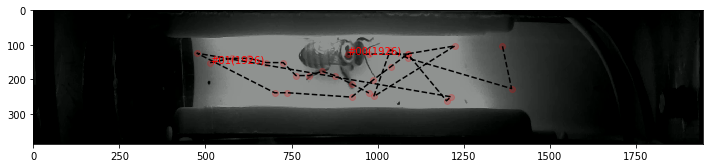

Detection/track statistics:


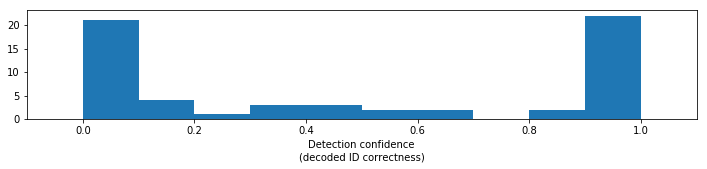

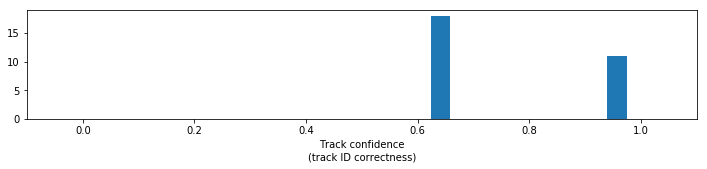

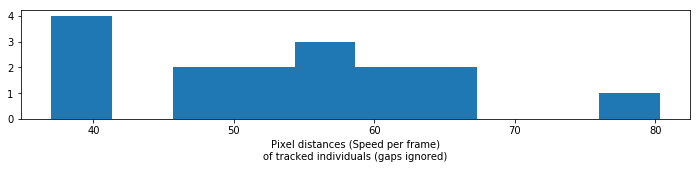

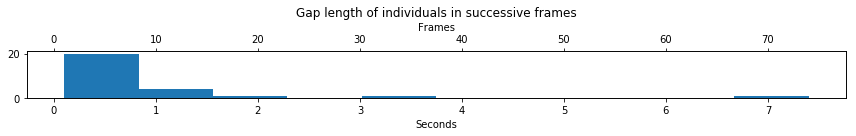

Individual statistics:


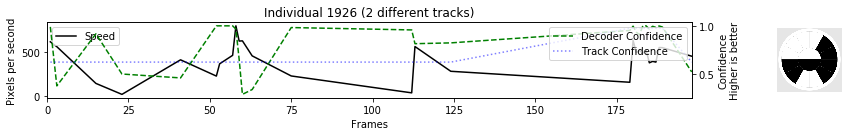

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.2, 'confidence_filter_tracks': 0.2, 'coordinate_scale': 1, 'start_time': None, 'fps': 10.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 4 unique tracks and 1 individuals.


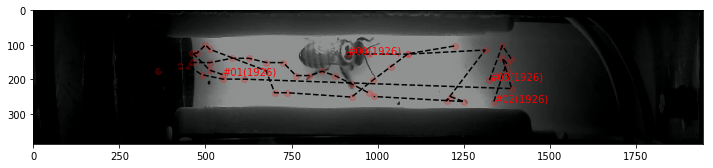

Detection/track statistics:


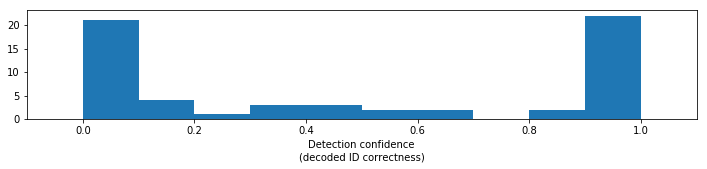

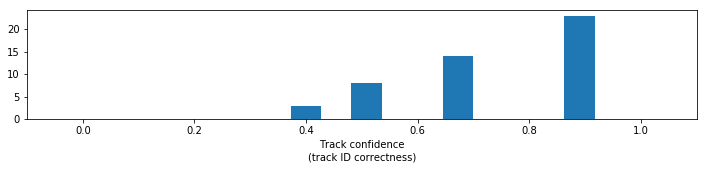

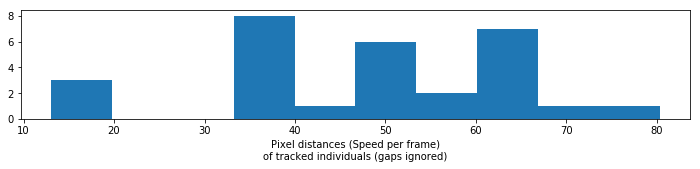

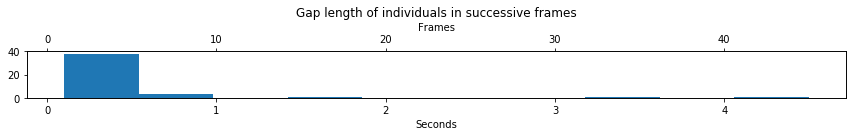

Individual statistics:


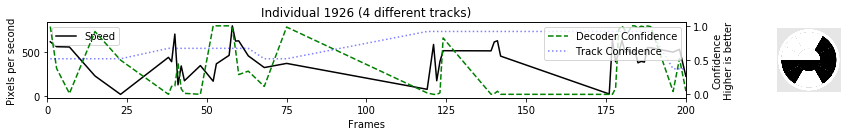

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.3, 'coordinate_scale': 1.0, 'start_time': None, 'fps': 10.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


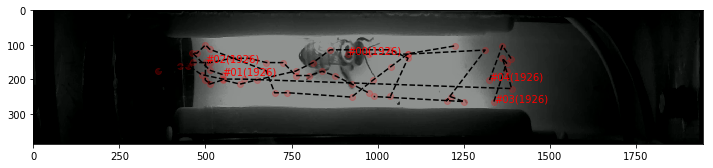

Detection/track statistics:


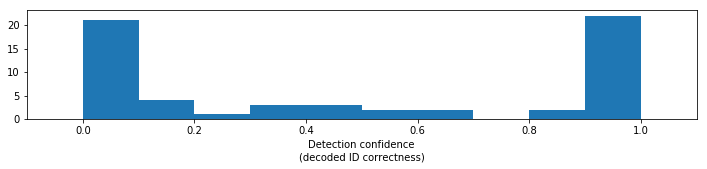

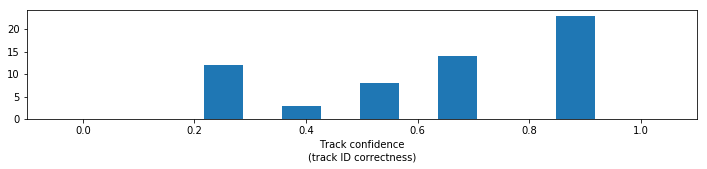

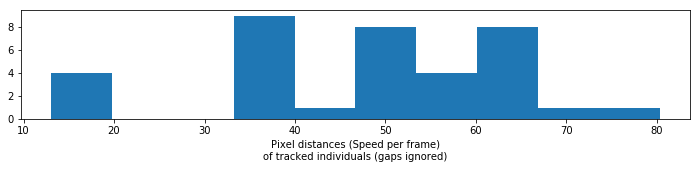

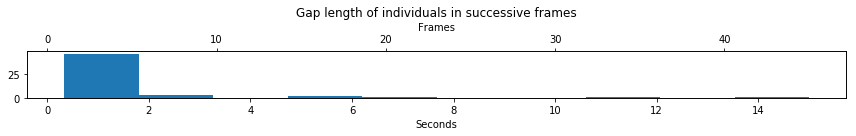

Individual statistics:


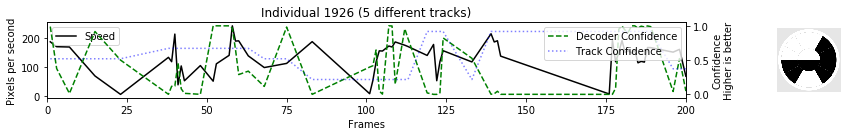

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 0.85, 'start_time': None, 'fps': 3.0, 'cam_id': 0}


In [21]:
num_processed_videos = 0
video_data = dict()
frame_info = None
detections = None


for config in tqdm_notebook(configs):
    start_time, path = config["start_time"], config["path"]
    cam_id = config["cam_id"]#int(path[cam_id_idx])
    #pipelines.reset(4)
    
    try:
        num_processed_videos += 1

        frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
        tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
        display_tracking_results(config["path"], frame_info, detections, tracks)
        video_data[path] = (frame_info, detections, tracks)
        print(config)
    
    except Exception as err:
        print(err)
        raise
    # only first vid
    #break
    

In [30]:
tracks

,id,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,confidence,track_id,track_confidence,bee_id
0,f14994088785686694533d0c0,0.688078,"[0.99784017, 0.0001437068, 0.0003311038, 1.132...",912.430529,126.998674,0,0.089175,0.000000,0,9.942605e-01,0,0.519272,1926
0,f17416301788223402978d0c0,0.674689,"[0.9999927, 4.169345e-05, 1.1622906e-06, 8.046...",974.536364,126.958956,0,-0.139244,0.333333,1,9.885683e-01,0,0.519272,1926
0,f15877832607143686540d0c0,0.687777,"[0.99854314, 0.21899122, 0.00043278933, 0.0002...",1087.552650,127.151928,0,0.046847,1.000000,3,3.766602e-01,0,0.519272,1926
0,f14102468324811273541d0c0,0.667169,"[0.5131483, 0.01077801, 0.0011860728, 0.000248...",1311.874615,115.248051,0,-0.094585,2.333333,7,1.358892e-02,0,0.519272,1926
0,f12884886386680618343d0c0,0.660274,"[0.9984825, 3.299117e-05, 2.9087067e-05, 4.231...",1199.793835,262.587893,0,2.071011,5.000000,15,9.168164e-01,0,0.519272,1926
0,f16416523321435357413d0c0,0.655578,"[0.99990785, 5.8054924e-05, 4.172325e-07, 3.87...",1212.585613,251.046106,0,1.911840,7.666667,23,4.997132e-01,0,0.519272,1926
0,f16151822754603758058d0c0,0.669532,"[0.8353583, 0.026736587, 0.0665628, 0.01522532...",549.873152,186.494644,0,-3.001573,12.666667,38,1.168070e-03,1,0.671165,1926
0,f14235203635669197175d0c0,0.670466,"[0.99635774, 0.03613785, 0.023948759, 0.001328...",512.545910,173.826654,0,-2.718555,13.000000,39,1.179060e-01,1,0.671165,1926
0,f17778409912478904728d0c0,0.704565,"[0.9933269, 0.6648356, 0.006554663, 0.00013861...",462.318939,123.780151,0,-2.803945,13.333333,40,1.210965e-01,1,0.671165,1926
0,f9801702175912591047d0c0,0.694593,"[0.9978933, 0.007896394, 0.0006965697, 0.00015...",475.328827,124.561377,0,-2.564812,13.666667,41,4.593289e-01,1,0.671165,1926


In [39]:
# I want: bee_id, [list of positions (x,y)], [list of timestamps]

timestamp = videoname to timestamp + timestamp (seconds)

0
                          id  localizerSaliency  \
0  f14994088785686694533d0c0           0.688078   
0  f17416301788223402978d0c0           0.674689   
0  f15877832607143686540d0c0           0.687777   
0  f14102468324811273541d0c0           0.667169   
0  f12884886386680618343d0c0           0.660274   
0  f16416523321435357413d0c0           0.655578   
0  f14341963917271940590d0c0           0.655073   
0   f9313027860192025133d0c0           0.672342   

                                               beeID         xpos        ypos  \
0  [0.99784017, 0.0001437068, 0.0003311038, 1.132...   912.430529  126.998674   
0  [0.9999927, 4.169345e-05, 1.1622906e-06, 8.046...   974.536364  126.958956   
0  [0.99854314, 0.21899122, 0.00043278933, 0.0002...  1087.552650  127.151928   
0  [0.5131483, 0.01077801, 0.0011860728, 0.000248...  1311.874615  115.248051   
0  [0.9984825, 3.299117e-05, 2.9087067e-05, 4.231...  1199.793835  262.587893   
0  [0.99990785, 5.8054924e-05, 4.172325e-07, 3.87...

/home/tscho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys



1
                          id  localizerSaliency  \
0  f16151822754603758058d0c0           0.669532   
0  f14235203635669197175d0c0           0.670466   
0  f17778409912478904728d0c0           0.704565   
0   f9801702175912591047d0c0           0.694593   
0  f13864411710486105922d0c0           0.681473   
0  f14515020903526559850d0c0           0.653062   
0  f13340567177173526189d0c0           0.656272   
0  f15873196282492541033d0c0           0.700721   
0  f12794705610708324372d0c0           0.698772   
0  f12657091804567326390d0c0           0.677101   
0   f9459328583809503540d0c0           0.668487   
0  f10122280025164049555d0c0           0.673042   
0  f17777498038248257488d0c0           0.672760   
0  f16974680261697839760d0c0           0.650091   

                                               beeID         xpos        ypos  \
0  [0.8353583, 0.026736587, 0.0665628, 0.01522532...   549.873152  186.494644   
0  [0.99635774, 0.03613785, 0.023948759, 0.001328...   512.545910  17

In [40]:
tracks

,id,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,confidence,track_id,track_confidence,bee_id
0,f14994088785686694533d0c0,0.688078,"[0.99784017, 0.0001437068, 0.0003311038, 1.132...",912.430529,126.998674,0,0.089175,0.000000,0,9.942605e-01,0,0.519272,1926
0,f17416301788223402978d0c0,0.674689,"[0.9999927, 4.169345e-05, 1.1622906e-06, 8.046...",974.536364,126.958956,0,-0.139244,0.333333,1,9.885683e-01,0,0.519272,1926
0,f15877832607143686540d0c0,0.687777,"[0.99854314, 0.21899122, 0.00043278933, 0.0002...",1087.552650,127.151928,0,0.046847,1.000000,3,3.766602e-01,0,0.519272,1926
0,f14102468324811273541d0c0,0.667169,"[0.5131483, 0.01077801, 0.0011860728, 0.000248...",1311.874615,115.248051,0,-0.094585,2.333333,7,1.358892e-02,0,0.519272,1926
0,f12884886386680618343d0c0,0.660274,"[0.9984825, 3.299117e-05, 2.9087067e-05, 4.231...",1199.793835,262.587893,0,2.071011,5.000000,15,9.168164e-01,0,0.519272,1926
0,f16416523321435357413d0c0,0.655578,"[0.99990785, 5.8054924e-05, 4.172325e-07, 3.87...",1212.585613,251.046106,0,1.911840,7.666667,23,4.997132e-01,0,0.519272,1926
0,f16151822754603758058d0c0,0.669532,"[0.8353583, 0.026736587, 0.0665628, 0.01522532...",549.873152,186.494644,0,-3.001573,12.666667,38,1.168070e-03,1,0.671165,1926
0,f14235203635669197175d0c0,0.670466,"[0.99635774, 0.03613785, 0.023948759, 0.001328...",512.545910,173.826654,0,-2.718555,13.000000,39,1.179060e-01,1,0.671165,1926
0,f17778409912478904728d0c0,0.704565,"[0.9933269, 0.6648356, 0.006554663, 0.00013861...",462.318939,123.780151,0,-2.803945,13.333333,40,1.210965e-01,1,0.671165,1926
0,f9801702175912591047d0c0,0.694593,"[0.9978933, 0.007896394, 0.0006965697, 0.00015...",475.328827,124.561377,0,-2.564812,13.666667,41,4.593289e-01,1,0.671165,1926


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


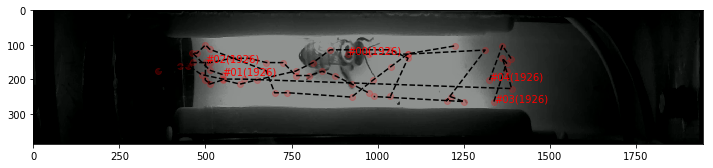

Detection/track statistics:


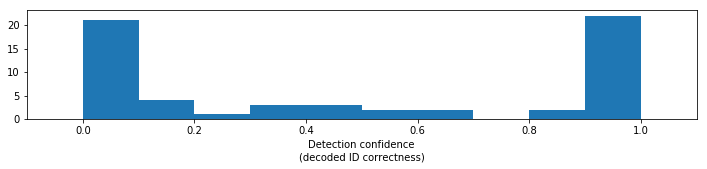

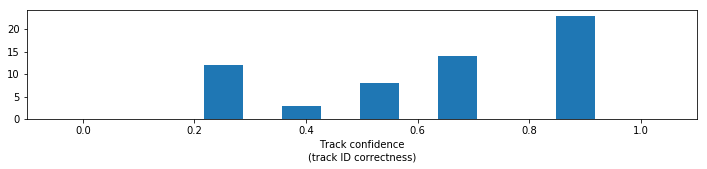

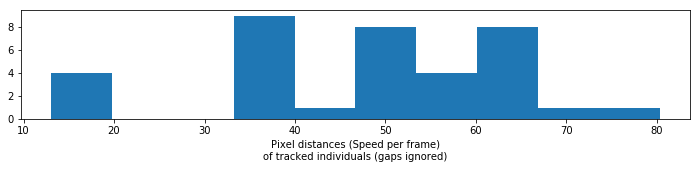

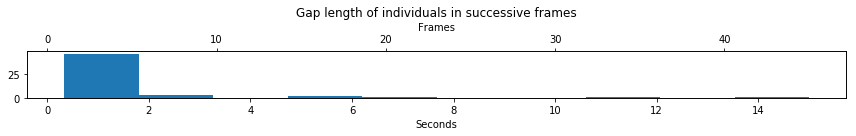

Individual statistics:


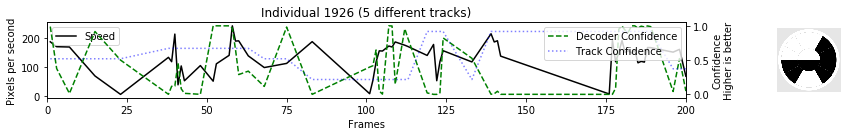

In [103]:
config = configs[0]

frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
video_data[path] = (frame_info, detections, tracks)
display_tracking_results(config["path"], frame_info, detections, tracks)

In [105]:
config

{'cam_id': 0,
 'confidence_filter_detections': 0.0,
 'confidence_filter_tracks': 0.0,
 'coordinate_scale': 1,
 'fps': 3.0,
 'n_frames': None,
 'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 'start_time': None,
 'tag_pixel_diameter': 50}

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


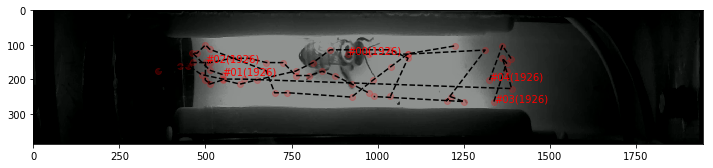

Detection/track statistics:


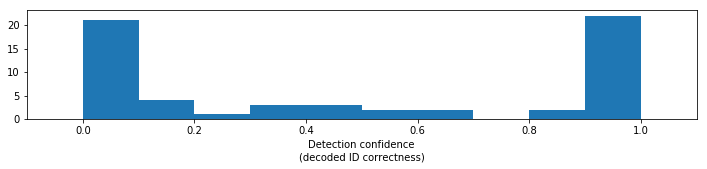

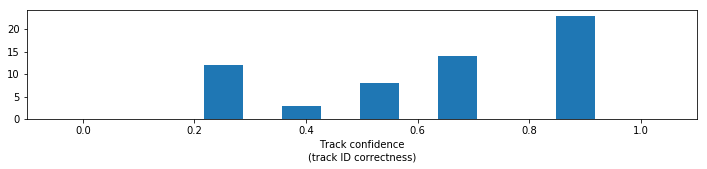

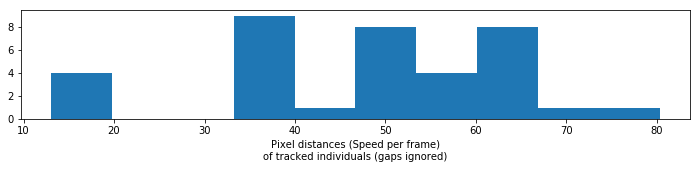

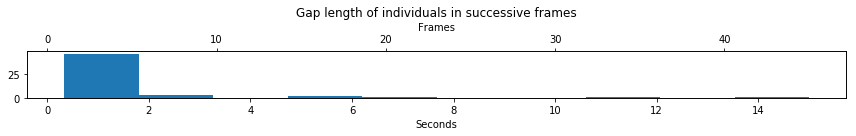

Individual statistics:


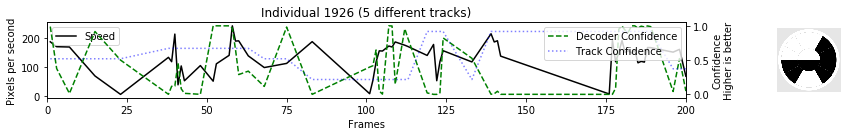

{'cam_id': 0,
 'confidence_filter_detections': 0.0,
 'confidence_filter_tracks': 0.0,
 'coordinate_scale': 0.85,
 'fps': 3.0,
 'n_frames': None,
 'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 'start_time': None,
 'tag_pixel_diameter': 50}

In [102]:
config = configs[4]

frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
video_data[path] = (frame_info, detections, tracks)
display_tracking_results(config["path"], frame_info, detections, tracks)
config

In [110]:
tracks

,id,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,confidence,track_id,track_confidence,bee_id
0,f10908569516138566952d0c0,0.688078,"[0.99784017, 0.0001437068, 0.0003311038, 1.132...",912.430529,126.998674,0,0.089175,0.000000,0,9.942605e-01,0,0.519272,1926
0,f16680002725693325236d0c0,0.674689,"[0.9999927, 4.169345e-05, 1.1622906e-06, 8.046...",974.536364,126.958956,0,-0.139244,0.333333,1,9.885683e-01,0,0.519272,1926
0,f17869457354731890685d0c0,0.687777,"[0.99854314, 0.21899119, 0.00043278933, 0.0002...",1087.552650,127.151928,0,0.046847,1.000000,3,3.766603e-01,0,0.519272,1926
0,f16781581644097826344d0c0,0.667169,"[0.5131483, 0.01077801, 0.0011860728, 0.000248...",1311.874615,115.248051,0,-0.094585,2.333333,7,1.358892e-02,0,0.519272,1926
0,f10357713406767676976d0c0,0.660274,"[0.9984825, 3.299117e-05, 2.9087067e-05, 4.231...",1199.793835,262.587893,0,2.071011,5.000000,15,9.168164e-01,0,0.519272,1926
0,f16515593981739389874d0c0,0.655578,"[0.99990785, 5.8054924e-05, 4.172325e-07, 3.87...",1212.585613,251.046106,0,1.911840,7.666667,23,4.997132e-01,0,0.519272,1926
0,f12195990658272170785d0c0,0.669532,"[0.8353583, 0.026736587, 0.0665628, 0.01522532...",549.873152,186.494644,0,-3.001573,12.666667,38,1.168070e-03,1,0.671165,1926
0,f9343897783269065032d0c0,0.670466,"[0.99635774, 0.03613785, 0.023948759, 0.001328...",512.545910,173.826654,0,-2.718555,13.000000,39,1.179061e-01,1,0.671165,1926
0,f11867899148229097634d0c0,0.704565,"[0.9933269, 0.6648356, 0.006554663, 0.00013861...",462.318939,123.780151,0,-2.803945,13.333333,40,1.210965e-01,1,0.671165,1926
0,f18153546298569845078d0c0,0.694593,"[0.9978933, 0.007896394, 0.0006965697, 0.00015...",475.328827,124.561377,0,-2.564812,13.666667,41,4.593289e-01,1,0.671165,1926


In [ ]:
import bb_utils

In [ ]:
def to_bee_id(bits):
    return bb_utils.ids.BeesbookID.from_bb_binary(bits).as_ferwar()
bee_ids = list(map(to_bee_id, detections.beeID.values))
detections["bee_id"] = bee_ids

In [ ]:
with open("/home/david/Downloads/ants/detections.csv", "w") as f:
    detections.to_csv(f)
with open("/home/david/Downloads/ants/tracks.csv", "w") as f:
    tracks.to_csv(f)